In [1]:
#Performing Task3 from Learn Smashers Machine Learning Internship
#Apply K means Clustering or Hierarchical Clustering to find the group of people 
#who are the profitable customers for the mall owner.

In [7]:
#Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [5]:
#Loading the dataset
data3 = pd.read_csv("C:\\Users\\G.Madhu mitha\\Downloads\\Mall_Customers.csv")
data3.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
data4 = data3.drop('Genre',axis=1)
data4.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [14]:
#Cleaning the data i.e pre-processing the data
scaler = StandardScaler()
X = scaler.fit_transform(data4)
X

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

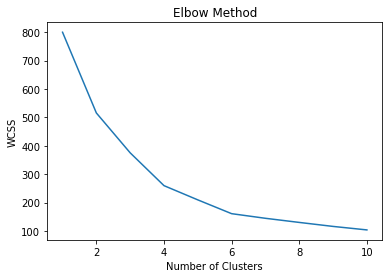

10


In [18]:
#Training the model
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print(i)

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

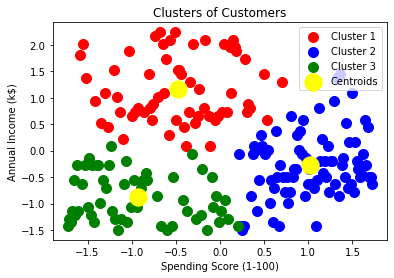

In [20]:
# Visualize Clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()


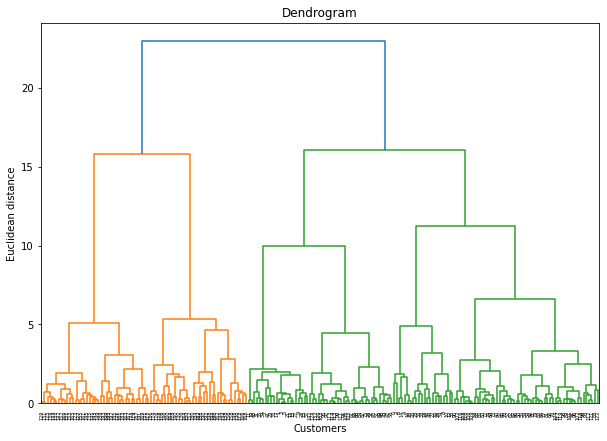

In [24]:
#Hierarchical clustering
# Determine optimal number of clusters using dendrogram
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()